# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudulent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [1]:
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

data = pd.read_csv("data/creditcard.csv")

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

# Base Logistic Regression

👇 Check class balance.

In [3]:
class_counts = data['Class'].value_counts()
class_counts

0    28432
1       49
Name: Class, dtype: int64

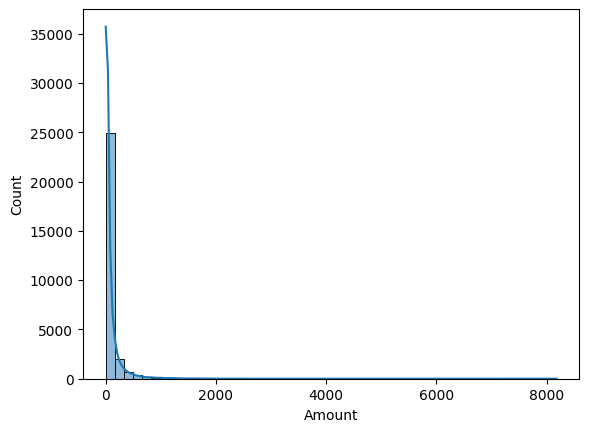

In [4]:
sns.histplot(data['Amount'], bins=50, kde=True);

/Users/arieleamorim/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


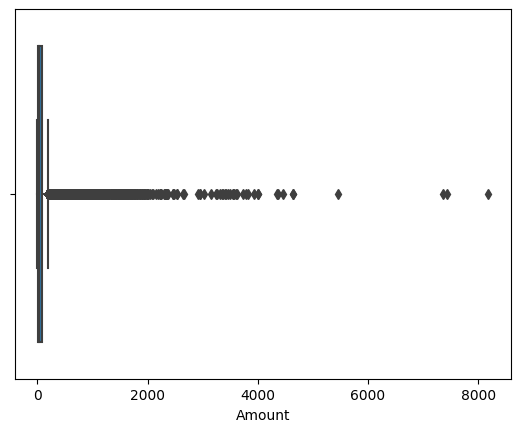

In [5]:
sns.boxplot(data['Amount']);

👇 Evaluate a base `LogisticRegression` for Recall. Use model parameter `class_weight = 'balanced'` to ensure it deals with class imbalance.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [7]:
from sklearn.preprocessing import RobustScaler

X=data.drop(columns='Class')       
y= data['Class']

# Instanciate Robust Scaler
rb_scaler = RobustScaler() 

# Fit the scaler to the `GrLiveArea`
X_scaled= pd.DataFrame(rb_scaler.fit_transform(X))

In [8]:
log_cv_results = cross_validate(LogisticRegression(max_iter=1000, class_weight = 'balanced' ), X_scaled, y, cv=10, 
                            scoring=['recall'])

log_cv_results['test_recall'].mean()

0.8800000000000001

ℹ️ A default Logistic Regression model can't guarantee a 90% recall. Its decision threshold needs to be adjusted to reach such a score.

# Threshold adjustment

In [14]:
from sklearn.metrics import precision_recall_curve

# Obtain the predicted values using cross-validation
Class0, Class1 = cross_val_predict(LogisticRegression(max_iter=1000,class_weight = 'balanced'),
                                                     X_scaled,y,
                                                     method = "predict_proba").T


# precision recall data
precision, recall, threshold = precision_recall_curve(y,Class1)
scores = pd.DataFrame({'recall':recall[:-1],'threshold':threshold, })
scores

,recall,threshold
0,1.000000,1.850670e-38
1,1.000000,2.505624e-36
2,1.000000,3.528004e-36
3,1.000000,6.013614e-33
4,1.000000,1.528247e-32
...,...,...
28420,0.285714,1.000000e+00
28421,0.265306,1.000000e+00
28422,0.244898,1.000000e+00
28423,0.224490,1.000000e+00


In [15]:
new_threshold= scores[scores['recall'] >= 0.9]['threshold'].max()
new_threshold

0.0005352696986237073

In [ ]:
The decision threshold that guarantees a 90% recall is 0.0005.